## Correlacion entre variables

In [9]:
import pandas as pd
import numpy as np
import os

In [10]:
mainpath="/Volumes/Developer/Study/Udemy/Machine Learning/python-ml-course/datasets"
filename="ads/Advertising.csv"
fullpath= os.path.join(mainpath, filename)

In [35]:
data_ads=pd.read_csv(fullpath)


In [14]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
data_ads["corrn"]=( data_ads["TV"] - np.mean(data_ads["TV"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))

In [16]:
data_ads.head()


,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [17]:
data_ads["corrn1"]= (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [18]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corrn1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [19]:
data_ads["corrn2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [20]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corrn1,corrn2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [23]:
corr= sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corrn1"])*sum(data_ads["corrn2"]))

In [24]:
corr

0.782224424861606

In [25]:
def corr_coef(df,var1,var2):
    df["corrn"]=( df[var1] - np.mean(df[var1]))*(df[var2]-np.mean(df[var2]))
    df["corrn1"]= (df[var1] - np.mean(df[var1]))**2
    df["corrn2"] = (df[var2] - np.mean(df[var2]))**2
    corrp= sum(df["corrn"])/np.sqrt(sum(df["corrn1"])*sum(df["corrn2"]))
    return corrp

In [26]:
corr_coef(data_ads,"TV","Sales")

0.782224424861606

In [29]:
cols=data_ads.columns.values

In [30]:
for x in cols:
    for y in cols:
        print( x + ", "+ y + ": " + str(corr_coef(data_ads,x,y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583009
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
Radio, TV: 0.05480866446583009
Radio, Radio: 1.0
Radio, Newspaper: 0.3541037507611752
Radio, Sales: 0.5762225745710553
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.3541037507611752
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616525
Sales, TV: 0.782224424861606
Sales, Radio: 0.5762225745710553
Sales, Newspaper: 0.22829902637616525
Sales, Sales: 1.0


In [31]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en Tv vs Ventas del Producto')

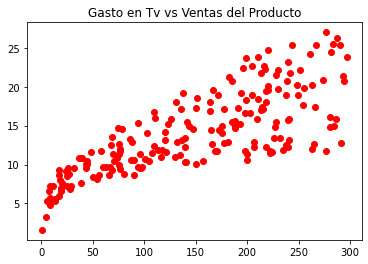

In [33]:
plt.plot(data_ads["TV"],data_ads["Sales"], "ro")
plt.title("Gasto en Tv vs Ventas del Producto")

In [36]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


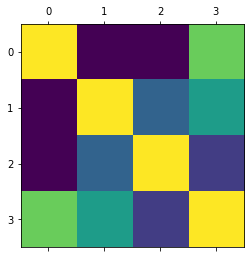

In [37]:
plt.matshow(data_ads.corr())